In [11]:
# Synthetic GPS-like clustering with DBSCAN, and cluster diameter analysis (meters)
import numpy as np
import pandas as pd
import os
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebookでのグラフ表示設定
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")

# 日本語フォント設定（Windows用）
plt.rcParams['font.family'] = ['DejaVu Sans', 'Hiragino Sans', 'Yu Gothic', 'Meiryo', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# グラフサイズの設定
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# caas_jupyter_toolsの代替機能
def display_dataframe_to_user(title, df, max_rows=20):
    """
    データフレームを美しく表示する関数（caas_jupyter_toolsの代替）
    """
    print(f"\n{'='*60}")
    print(f"📊 {title}")
    print(f"{'='*60}")
    
    # データフレームの基本情報
    print(f"�� Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"📝 Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
    
    # データ型の情報
    print(f"\n🔍 Data Types:")
    for col, dtype in df.dtypes.items():
        print(f"   {col}: {dtype}")
    
    # 欠損値の情報
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\n⚠️  Missing Values:")
        for col, missing in missing_values.items():
            if missing > 0:
                print(f"   {col}: {missing} ({missing/len(df)*100:.1f}%)")
    else:
        print(f"\n✅ No missing values found")
    
    # 数値列の統計情報
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 Numeric Columns Summary:")
        print(df[numeric_cols].describe())
    
    # データフレームの表示
    print(f"\n📋 Data Preview:")
    if len(df) > max_rows:
        print(f"Showing first {max_rows} rows (total: {len(df)})")
        print(df.head(max_rows).to_string())
        print(f"\n... and {len(df) - max_rows} more rows")
    else:
        print(df.to_string())
    
    # カテゴリカル列の情報
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(f"\n🏷️  Categorical Columns:")
        for col in categorical_cols:
            unique_vals = df[col].nunique()
            print(f"   {col}: {unique_vals} unique values")
            if unique_vals <= 10:
                print(f"      Values: {sorted(df[col].unique())}")
    
    print(f"\n{'='*60}\n")

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font famil

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font famil

📊 Generating visualizations...


findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font 

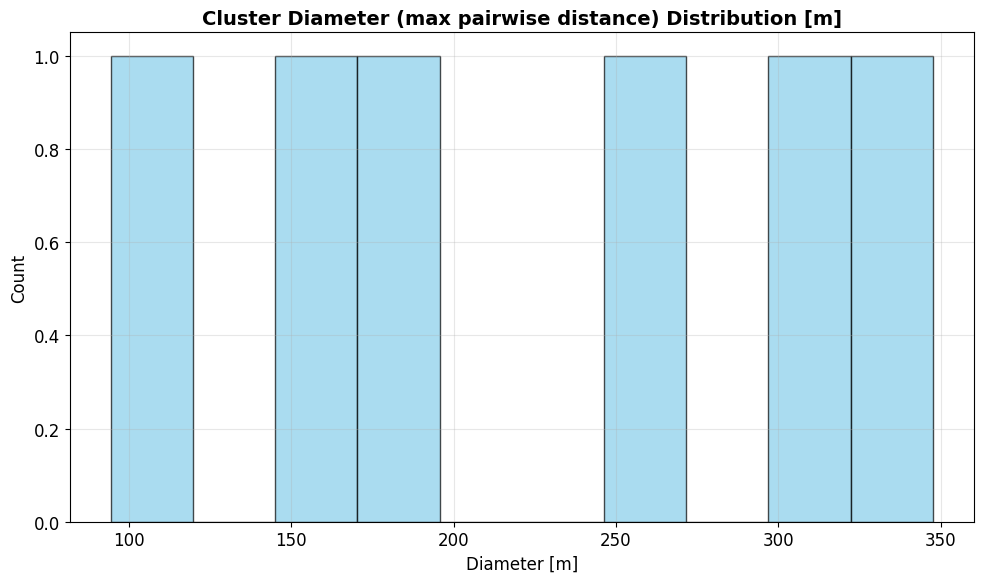

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font famil

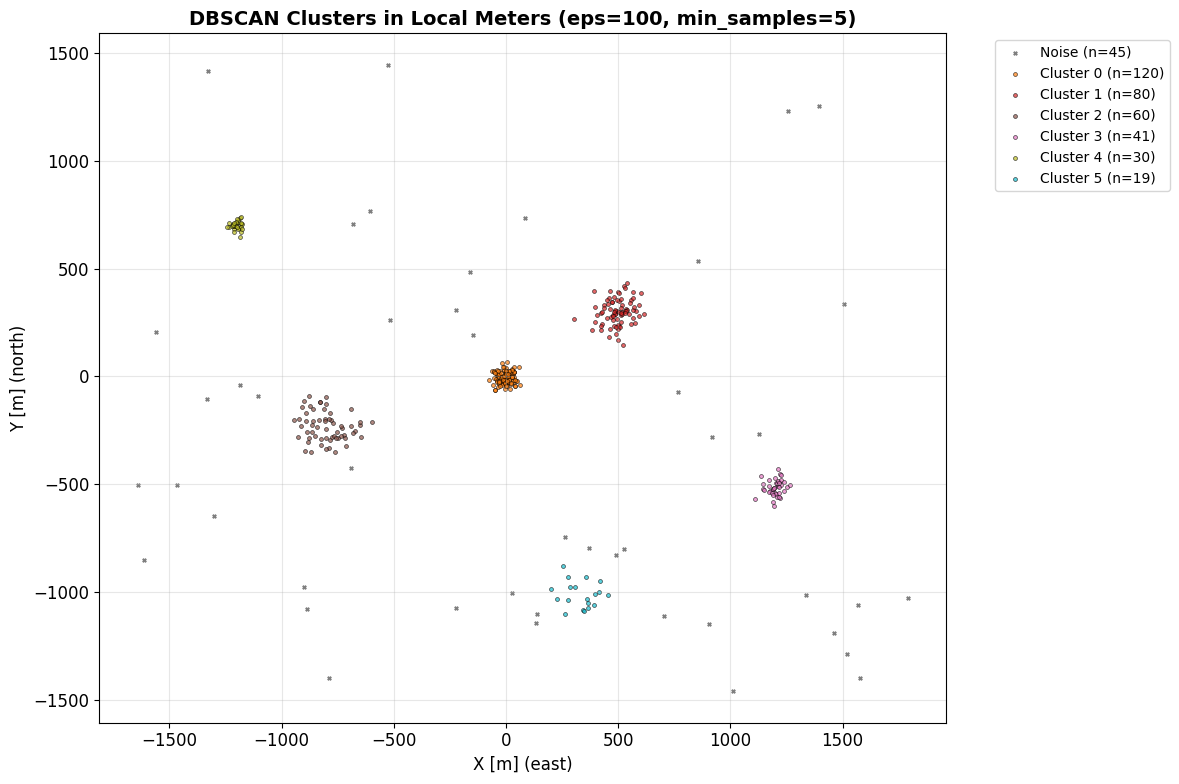

findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'VL PGothic' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Hiragino Sans' not found.
findfont: Font family 'Takao' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font famil

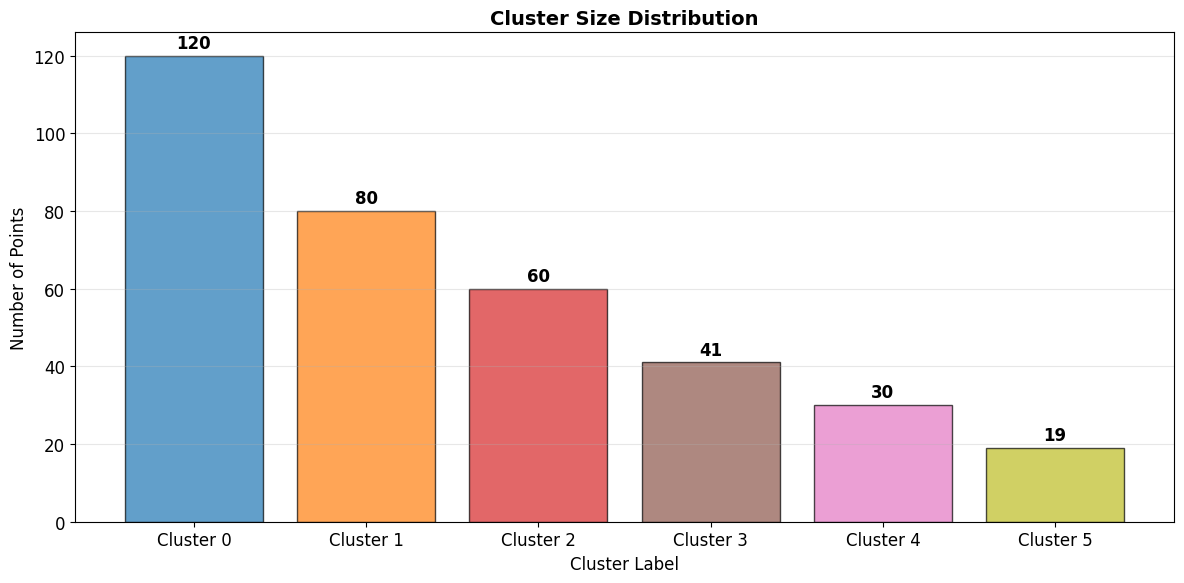


�� Cluster Statistics Summary:
  Cluster  Points       Mean X       Mean Y       Std X      Std Y
Cluster 0     120    -4.271905    -4.645895   27.520050  26.558730
Cluster 1      80   495.841406   299.191836   55.965377  59.369472
Cluster 2      60  -801.246876  -233.256429   80.355113  67.440256
Cluster 3      41  1198.988827  -515.229589   31.120079  36.234515
Cluster 4      30 -1201.388953   700.889105   18.143612  20.009976
Cluster 5      19   332.476971 -1012.215390   70.119977  60.806655
    Noise      45    63.286723  -346.113486 1049.382446 833.444451
✅ Visualizations completed!


In [12]:
# ----- Visualizations -----
print("📊 Generating visualizations...")

# 1. クラスター直径の分布ヒストグラム
plt.figure(figsize=(10, 6))
plt.hist(diameters, bins=10, alpha=0.7, edgecolor='black', color='skyblue')
plt.title("Cluster Diameter (max pairwise distance) Distribution [m]", fontsize=14, fontweight='bold')
plt.xlabel("Diameter [m]", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. DBSCANクラスターの散布図（データ数付き）
plt.figure(figsize=(12, 8))

# 各クラスターのデータ数を計算
cluster_counts = df["label_dbscan"].value_counts().sort_index()
colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_counts)))

# 各クラスターを個別にプロットして、凡例にデータ数を表示
for i, (cluster_label, count) in enumerate(cluster_counts.items()):
    if cluster_label == -1:
        # ノイズポイント（クラスター外）
        cluster_data = df[df["label_dbscan"] == cluster_label]
        plt.scatter(cluster_data["x_m"], cluster_data["y_m"], 
                   s=6, c='black', alpha=0.5, 
                   label=f'Noise (n={count})', marker='x')
    else:
        # クラスター内のポイント
        cluster_data = df[df["label_dbscan"] == cluster_label]
        plt.scatter(cluster_data["x_m"], cluster_data["y_m"], 
                   s=8, c=[colors[i]], alpha=0.7, edgecolors='black', linewidth=0.5,
                   label=f'Cluster {cluster_label} (n={count})')

plt.title("DBSCAN Clusters in Local Meters (eps=100, min_samples=5)", 
          fontsize=14, fontweight='bold')
plt.xlabel("X [m] (east)", fontsize=12)
plt.ylabel("Y [m] (north)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. クラスターサイズの棒グラフ（詳細版）
plt.figure(figsize=(12, 6))

# クラスターサイズのデータを準備
cluster_labels = sorted([l for l in np.unique(pred) if l >= 0])
cluster_sizes = [len(df[df["label_dbscan"] == lbl]) for lbl in cluster_labels]

# 棒グラフを作成
bars = plt.bar(range(len(cluster_sizes)), cluster_sizes, 
               alpha=0.7, color=colors[:len(cluster_sizes)], 
               edgecolor='black', linewidth=1)

# 棒グラフの上にデータ数を表示
for i, (bar, size) in enumerate(zip(bars, cluster_sizes)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             str(size), ha='center', va='bottom', fontweight='bold')

plt.title("Cluster Size Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Cluster Label", fontsize=12)
plt.ylabel("Number of Points", fontsize=12)
plt.xticks(range(len(cluster_sizes)), [f"Cluster {i}" for i in cluster_labels])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 4. クラスター統計のサマリーテーブルを表示
print("\n�� Cluster Statistics Summary:")
cluster_stats = []
for lbl in sorted([l for l in np.unique(pred) if l >= 0]):
    cluster_data = df[df["label_dbscan"] == lbl]
    stats = {
        'Cluster': f'Cluster {lbl}',
        'Points': len(cluster_data),
        'Mean X': cluster_data['x_m'].mean(),
        'Mean Y': cluster_data['y_m'].mean(),
        'Std X': cluster_data['x_m'].std(),
        'Std Y': cluster_data['y_m'].std()
    }
    cluster_stats.append(stats)

# ノイズポイントの統計も追加
noise_data = df[df["label_dbscan"] == -1]
if len(noise_data) > 0:
    noise_stats = {
        'Cluster': 'Noise',
        'Points': len(noise_data),
        'Mean X': noise_data['x_m'].mean(),
        'Mean Y': noise_data['y_m'].mean(),
        'Std X': noise_data['x_m'].std(),
        'Std Y': noise_data['y_m'].std()
    }
    cluster_stats.append(noise_stats)

cluster_summary_df = pd.DataFrame(cluster_stats)
print(cluster_summary_df.to_string(index=False))

print("✅ Visualizations completed!")